In [1]:
import numpy as np # For matrix and mathematical calculations
import pandas as pd # For storing and manipulating dataset
import seaborn as sns  # For Visualization of Data
import matplotlib.pyplot as plt # For Visualization of Data
from sklearn.preprocessing import OneHotEncoder # Converts Categorical Attribute to Numerical Attribute Vector
from sklearn.model_selection import train_test_split # To split data into train and test set

**1. Data Preprocessing**

In [2]:
iris = pd.read_csv("./Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris = iris.sample(frac=1).reset_index(drop=True) # Shuffling Data
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,96,5.7,3.0,4.2,1.2,Iris-versicolor
1,57,6.3,3.3,4.7,1.6,Iris-versicolor
2,56,5.7,2.8,4.5,1.3,Iris-versicolor
3,48,4.6,3.2,1.4,0.2,Iris-setosa
4,68,5.8,2.7,4.1,1.0,Iris-versicolor


In [4]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


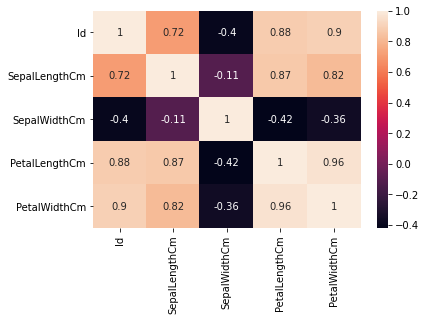

In [5]:
sns.heatmap(iris.corr(), annot = True); # To observe correlation between attributes

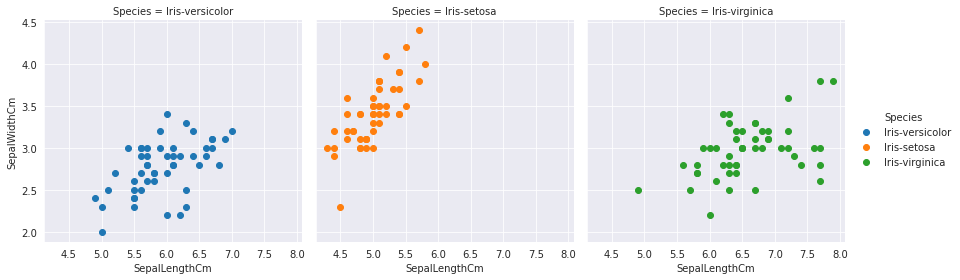

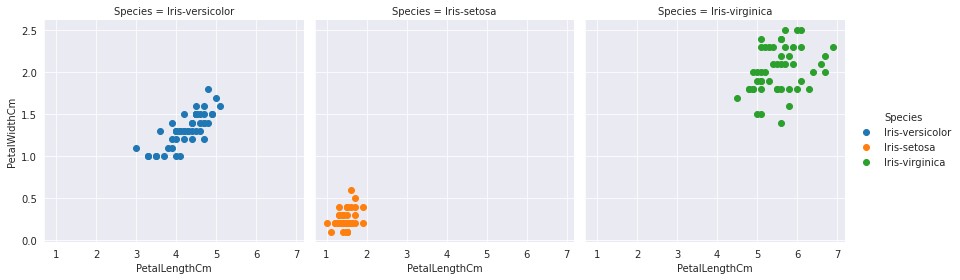

In [6]:
# Visualization of Dataset using Scatterplot
sns.set_style("darkgrid") 
sns.FacetGrid(iris, hue="Species",col='Species', height=4).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()
sns.FacetGrid(iris, hue="Species",col='Species', height=4).map(plt.scatter, "PetalLengthCm","PetalWidthCm").add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

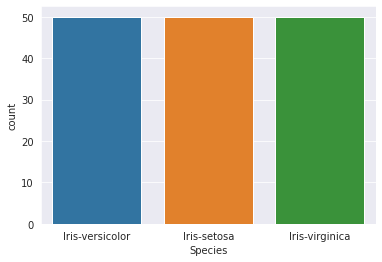

In [7]:
# Target or output values
Y = iris.Species

# Checking count of class labels
sns.countplot(Y)
Y.value_counts()

**2. Model Algorithm**

In [8]:
def NeuralNetwork(X_train, Y_train, X_val=None, Y_val=None, epochs=10, nodes=[], lr=0.15):
    hidden_layers = len(nodes) - 1
    weights = InitializeWeights(nodes)

    for epoch in range(1, epochs+1):
        weights = Train(X_train, Y_train, lr, weights)

        if(epoch % 20 == 0):
            print("Epoch {}".format(epoch))
            print("Training Accuracy:{}".format(Accuracy(X_train, Y_train, weights)))
            if X_val.any():
                print("Validation Accuracy:{}".format(Accuracy(X_val, Y_val, weights)))
            
    return weights

In [9]:
def InitializeWeights(nodes):
    """Initialize weights with random values in [-1, 1] (including bias)"""
    layers, weights = len(nodes), []
    
    for i in range(1, layers):
        w = [[np.random.uniform(-1, 1) for k in range(nodes[i-1] + 1)]
              for j in range(nodes[i])]
        weights.append(np.matrix(w))
    
    return weights

In [10]:
def ForwardPropagation(x, weights, layers):
    activations, layer_input = [x], x
    for j in range(layers):
        activation = Sigmoid(np.dot(layer_input, weights[j].T))
        activations.append(activation)
        layer_input = np.append(1, activation) # Augment with bias
    
    return activations

In [11]:
def BackPropagation(y, activations, weights, layers):
    outputFinal = activations[-1]
    error = np.matrix(y - outputFinal) # Error at output
    
    for j in range(layers, 0, -1):
        currActivation = activations[j]
        
        if(j > 1):
            # Augment previous activation
            prevActivation = np.append(1, activations[j-1])
        else:
            # First hidden layer, prevActivation is input (without bias)
            prevActivation = activations[0]
        
        delta = np.multiply(error, SigmoidDerivative(currActivation))
        weights[j-1] += lr * np.multiply(delta.T, prevActivation)

        w = np.delete(weights[j-1], [0], axis=1) # Remove bias from weights
        error = np.dot(delta, w) # Calculate error for current layer
    
    return weights

In [12]:
def Train(X, Y, lr, weights):
    layers = len(weights)
    for i in range(len(X)):
        x, y = X[i], Y[i]
        x = np.matrix(np.append(1, x)) # Augment feature vector
        
        activations = ForwardPropagation(x, weights, layers)
        weights = BackPropagation(y, activations, weights, layers)

    return weights

In [13]:
def Sigmoid(x):
    return 1 / (1 + np.exp(-x))

def SigmoidDerivative(x):
    return np.multiply(x, 1-x)

In [31]:
def Predict(item, weights):
    layers = len(weights)
    item = np.append(1, item) # Augment feature vector
    
    ##_Forward Propagation_##
    activations = ForwardPropagation(item, weights, layers)
    
    # Output layer values
    outputFinal = activations[-1].A1
    
    # Uncomment the line below and rerun cell to see actual outputs of the net's output layer
    print(outputFinal)
    
    index = FindMaxActivation(outputFinal)

    # Initialize prediction vector to zeros
    y = [0 for i in range(len(outputFinal))]
    y[index] = 1  # Set guessed class to 1

    return y # Return prediction vector


def FindMaxActivation(output):
    """Find max activation in output"""
    m, index = output[0], 0
    for i in range(1, len(output)):
        if(output[i] > m):
            m, index = output[i], i
    
    return index

In [15]:
def Accuracy(X, Y, weights):
    """Run set through network, find overall accuracy"""
    correct = 0

    for i in range(len(X)):
        x, y = X[i], list(Y[i])
        guess = Predict(x, weights)

        if(y == guess):
            # Guessed correctly
            correct += 1

    return correct / len(X)

**3. Training the BPN Model**

In [16]:
# Data or input values - for training neural net
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
X = np.array(X)
X[:5]

array([[5.7, 3. , 4.2, 1.2],
       [6.3, 3.3, 4.7, 1.6],
       [5.7, 2.8, 4.5, 1.3],
       [4.6, 3.2, 1.4, 0.2],
       [5.8, 2.7, 4.1, 1. ]])

In [17]:
# Converting categorical values to One-Hot-Encoded vectors
# [1,0,0] : Iris setosa
# [0,1,0] : Iris versicolor
# [0,0,1] : Iris virginica

one_hot_encoder = OneHotEncoder(sparse=False)

# Target values - for comparing and calculating error values
Y = one_hot_encoder.fit_transform(np.array(Y).reshape(-1, 1))
Y[:5]

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1)

In [27]:
f = len(X[0]) # Number of features
o = len(Y[0]) # Number of outputs / classes

layers = [f, 8,10 ,8 ,o] # Number of nodes in layers
lr, epochs = 0.10, 100

weights = NeuralNetwork(X_train, Y_train, X_val, Y_val, epochs=epochs, nodes=layers, lr=lr);

Epoch 20
Training Accuracy:0.9736842105263158
Validation Accuracy:0.9230769230769231
Epoch 40
Training Accuracy:0.9736842105263158
Validation Accuracy:0.9230769230769231
Epoch 60
Training Accuracy:0.956140350877193
Validation Accuracy:1.0
Epoch 80
Training Accuracy:0.9385964912280702
Validation Accuracy:1.0
Epoch 100
Training Accuracy:0.9736842105263158
Validation Accuracy:1.0


In [28]:
# Weights after training
weights

[matrix([[ 1.11891559,  1.24999922,  1.52896399, -1.7577655 , -2.92519689],
         [ 0.40396372,  0.41730951,  0.17973635,  0.47502879, -0.29392521],
         [ 0.14330023,  0.62159917,  0.36553016, -1.31363414, -0.38558726],
         [-0.29594861, -0.84896376, -0.50288971,  0.39689877, -0.48259111],
         [ 0.00717612,  0.7864427 ,  0.60611877, -1.93603087, -1.37768287],
         [-0.74641515, -1.62964332, -2.46166757,  2.58716151,  3.41230192],
         [ 0.06256268,  0.5614603 ,  1.49510437, -0.86283463, -2.31852291],
         [ 0.49696584, -1.00323302, -0.57646409,  1.15216548,  1.81772822]]),
 matrix([[-0.14982762,  1.74229112,  0.20933522, -0.08284655, -0.73451841,
           1.25195287, -0.59146889, -0.05671484, -1.19238909],
         [ 0.09910358, -1.58188166,  0.64267911, -0.87052637, -0.58519751,
          -1.01167396,  1.34015145, -0.90076385,  0.73866286],
         [-1.01088516,  0.74905778, -0.35298075,  0.90327261, -0.99835716,
           1.69505818, -1.37017764,  0.

**4. Model Evaluation**

In [29]:
print("Testing Accuracy: {}".format(Accuracy(X_test, Y_test, weights)))

Testing Accuracy: 0.9565217391304348


In [32]:
# Inserting random input value outside dataset for class predicition

sep_len = np.random.uniform(4,8)
sep_wid = np.random.uniform(2,5)
pet_len = np.random.uniform(1,7)
pet_wid = np.random.uniform(0.1,2.5)

item=[sep_len,sep_wid,pet_len,pet_wid]
print(item)

predicted_output = Predict(item,weights)
print(predicted_output)
# [1,0,0] : Iris setosa
# [0,1,0] : Iris versicolor
# [0,0,1] : Iris virginica

if predicted_output[0]==1:
  print("Iris setosa")
elif predicted_output[1]==1:
  print("Iris versicolor")
else:
  print("Iris virginica")


[6.834173844908249, 3.0048130812201603, 3.90545545961374, 1.7503850164581407]
[0.07443916 0.88540114 0.02523859]
[0, 1, 0]
Iris versicolor
